In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time

Generate data based on a linear equation ($y = 2x + 5$) distorted with noise.

<function matplotlib.pyplot.show(close=None, block=None)>

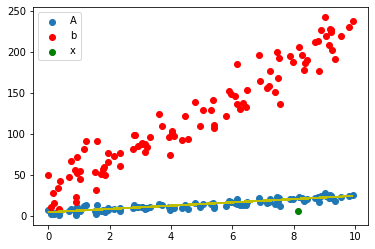

In [2]:
def lin():
    """
    Where A is an array of inputs for 'x'
    """
    li = [0]*100
    Y = [0]*100
    O = [0]*100
    for i in range(100):
        li[i] = random.random()*10
        y = 2*li[i] + 5
        Y[i] = y + np.random.normal(0,3) #adding noise
        O[i] = [li[i],Y[i]]
    return O

A = lin()

xVec = np.random.rand(2)*10
temp = np.matmul(A,xVec)
b = temp + np.random.normal(0,3,temp.shape)

def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.matmul(a,X)-B)**2

def f_grad(X,a=A, B=b):
    return np.matmul(np.array(a).transpose(),(np.matmul(a,X)-B))

def GD(x, lamb, gradient_function):
    x1 = x - lamb*gradient_function(x)
    return x1

aaa = [0]*100
bbb = [0]*100
ccc = [0]*100
for i in range(100):
    aaa[i] = A[i][0]
    bbb[i] = A[i][1]
    ccc[i] = 2*A[i][0] + 5
plt.scatter(aaa, bbb, label = 'A')
plt.scatter(aaa, b, c = 'r', label = 'b')
plt.scatter(xVec[0], xVec[1], c = 'g', label = 'x')
plt.plot(aaa, ccc, 'y')
plt.legend(loc = 'best')
plt.show

\begin{align}
\text{min } \mathbf{x}: \\
f(\mathbf{x}) &= \frac{1}{2} \|A \mathbf{x} - b \|^2\\
\nabla f(\mathbf{\mathbf{x}}) &= A^T(A \mathbf{x} -b)\\
{\mathbf{x}}_{k+1} &= \mathbf{x}_k - \lambda_k \nabla f(\mathbf{x}_k)
\end{align}


## Backtracking Line Search

In [3]:
def Line(x,f,f_grad):
    line_time = time.time()
    rho = random.random() + 1e-20
    c = random.random() + 1e-20
    alph = 1
    p = np.linalg.norm(f_grad(x))**2
    while ((f(x - alph*f_grad(x)) > f(x) - c*alph*p) and \
           (np.linalg.norm(f_grad(x - alph*f_grad(x)))**2 > p)):
#         print('LHS: ', f(x - alph*f_grad(x)))
#         print('RHS: ', f(x) - c*alph*np.linalg.norm(f_grad(x))**2)
        ## is norm the right move here?
        alph = rho*alph
#     print('Alpha:', alph)
    print('At iteration ', count, 'The line search took ', \
          time.time() - line_time , 'to produce a step size of ', alph)    
    return alph
    

In [4]:
np.linalg.norm(f_grad(x))**2

NameError: name 'x' is not defined

In [41]:
np.linalg.norm(f_grad(x - 1e-5*f_grad(x)))**2

4.080141054844047e-09

In [5]:
x = xVec

In [39]:
f_grad(x)

array([5.76387469e-05, 5.65763452e-05])

In [6]:

current = time.time()
X = []
# L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
# lamb = 1/L
x = xVec
count = 1
lamb = Line(x,f,f_grad)
step_size_list = [lamb]
gr2 = []

while np.linalg.norm(f_grad(x)) > 1e-6:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr2.append(np.linalg.norm(f_grad(x)))
    count += 1
    lamb = Line(x,f,f_grad)
    step_size_list.append(lamb)
#     if time.time() - current > 30:
#         break
#     print('x= ', x)
#     print('lambda', lamb)


At iteration  1 The line search took  0.00892782211303711 to produce a step size of  4.037958183978017e-05
At iteration  2 The line search took  0.007440328598022461 to produce a step size of  3.0020723500080505e-05
At iteration  3 The line search took  0.00745701789855957 to produce a step size of  0.0004280338724598558
At iteration  4 The line search took  0.009445428848266602 to produce a step size of  2.4025326557865182e-05
At iteration  5 The line search took  0.018845081329345703 to produce a step size of  5.7339502295169265e-05
At iteration  6 The line search took  0.002480030059814453 to produce a step size of  9.525346601673614e-05
At iteration  7 The line search took  0.24055862426757812 to produce a step size of  7.303210792267159e-05
At iteration  8 The line search took  0.006447792053222656 to produce a step size of  8.643067409065588e-05
At iteration  9 The line search took  0.009916067123413086 to produce a step size of  6.406730251053345e-05
At iteration  10 The line se

At iteration  77 The line search took  0.010912895202636719 to produce a step size of  6.197101859068605e-05
At iteration  78 The line search took  0.010415792465209961 to produce a step size of  7.334648498361727e-05
At iteration  79 The line search took  0.01587200164794922 to produce a step size of  7.318967902516104e-05
At iteration  80 The line search took  0.004463911056518555 to produce a step size of  7.297698586230739e-05
At iteration  81 The line search took  0.015871763229370117 to produce a step size of  6.628542132924879e-05
At iteration  82 The line search took  0.005951881408691406 to produce a step size of  2.2350601796502657e-05
At iteration  83 The line search took  0.004463672637939453 to produce a step size of  1.5456542439689085e-05
At iteration  84 The line search took  0.035218000411987305 to produce a step size of  0.000273090740065619
At iteration  85 The line search took  0.0060007572174072266 to produce a step size of  5.298166098659452e-05
At iteration  86 T

At iteration  161 The line search took  0.011446714401245117 to produce a step size of  0.0006877343842014776
At iteration  162 The line search took  0.004959821701049805 to produce a step size of  3.2298365937483476e-05
At iteration  163 The line search took  0.006448030471801758 to produce a step size of  0.00013173628781858353
At iteration  164 The line search took  0.003968000411987305 to produce a step size of  3.173203147513461e-05
At iteration  165 The line search took  0.10663986206054688 to produce a step size of  0.0015914097245585375
At iteration  166 The line search took  0.03273630142211914 to produce a step size of  6.923500974471935e-05
At iteration  167 The line search took  0.09030914306640625 to produce a step size of  6.825673035461751e-05
At iteration  168 The line search took  0.008433103561401367 to produce a step size of  4.131242045748576e-05
At iteration  169 The line search took  0.0074727535247802734 to produce a step size of  7.052775189115978e-05
At iterati

At iteration  238 The line search took  0.11507248878479004 to produce a step size of  7.272854196724861e-05
At iteration  239 The line search took  0.024801015853881836 to produce a step size of  6.748499551474211e-05
At iteration  240 The line search took  0.014880180358886719 to produce a step size of  6.944492460165972e-05
At iteration  241 The line search took  0.030752182006835938 to produce a step size of  7.03005199634605e-05
At iteration  242 The line search took  0.3497049808502197 to produce a step size of  7.191927325145963e-05
At iteration  243 The line search took  0.014408349990844727 to produce a step size of  4.673324047196134e-05
At iteration  244 The line search took  0.003967761993408203 to produce a step size of  6.546680062732273e-05
At iteration  245 The line search took  0.028767824172973633 to produce a step size of  0.000223469761112182
At iteration  246 The line search took  0.014358282089233398 to produce a step size of  4.781260168445542e-05
At iteration  2

At iteration  315 The line search took  0.012400150299072266 to produce a step size of  4.7868938876199675e-05
At iteration  316 The line search took  0.003968000411987305 to produce a step size of  1.5415085906604405e-05
At iteration  317 The line search took  0.004959821701049805 to produce a step size of  0.00032365735756576284
At iteration  318 The line search took  0.01041555404663086 to produce a step size of  6.272055086136024e-05
At iteration  319 The line search took  0.00892782211303711 to produce a step size of  3.1233076179729114e-05
At iteration  320 The line search took  0.007935762405395508 to produce a step size of  5.834817562965111e-05
At iteration  321 The line search took  0.01686382293701172 to produce a step size of  0.00025840395276333403
At iteration  322 The line search took  0.008928060531616211 to produce a step size of  4.2056727889095825e-05
At iteration  323 The line search took  0.0039675235748291016 to produce a step size of  0.00010170014377637975
At it

At iteration  391 The line search took  0.020882606506347656 to produce a step size of  5.425094004128446e-05
At iteration  392 The line search took  0.006447792053222656 to produce a step size of  6.200779025246816e-05
At iteration  393 The line search took  0.0054473876953125 to produce a step size of  0.00015041721632606047
At iteration  394 The line search took  0.004463672637939453 to produce a step size of  3.51180408884685e-05
At iteration  395 The line search took  0.04364776611328125 to produce a step size of  0.0005852412184064437
At iteration  396 The line search took  0.047617435455322266 to produce a step size of  6.85827533934133e-05
At iteration  397 The line search took  0.029786109924316406 to produce a step size of  7.947288724206483e-05
At iteration  398 The line search took  0.013939857482910156 to produce a step size of  6.17178472675659e-05
At iteration  399 The line search took  0.02475142478942871 to produce a step size of  6.811605796449088e-05
At iteration  40

At iteration  466 The line search took  0.015378713607788086 to produce a step size of  4.2867648008047485e-05
At iteration  467 The line search took  0.00942373275756836 to produce a step size of  6.00304958067353e-05
At iteration  468 The line search took  0.01289510726928711 to produce a step size of  3.313393418367416e-05
At iteration  469 The line search took  0.006007194519042969 to produce a step size of  0.0006135041119615683
At iteration  470 The line search took  0.25690364837646484 to produce a step size of  0.00015462331868535222
At iteration  471 The line search took  0.46128153800964355 to produce a step size of  7.403018237425595e-05
At iteration  472 The line search took  0.03273630142211914 to produce a step size of  6.0652195582952396e-05
At iteration  473 The line search took  0.023311376571655273 to produce a step size of  0.00012032275624305965
At iteration  474 The line search took  0.14190006256103516 to produce a step size of  6.991656900762854e-05
At iteration 

At iteration  552 The line search took  0.02185511589050293 to produce a step size of  6.265964154539503e-05
At iteration  553 The line search took  0.009423494338989258 to produce a step size of  6.964827936912551e-05
At iteration  554 The line search took  0.02529597282409668 to produce a step size of  0.00013194042313684055
At iteration  555 The line search took  0.02829766273498535 to produce a step size of  6.749549228974982e-05
At iteration  556 The line search took  0.005455493927001953 to produce a step size of  7.25557736505005e-05
At iteration  557 The line search took  0.021327972412109375 to produce a step size of  5.762332247247117e-05
At iteration  558 The line search took  0.010415792465209961 to produce a step size of  5.2895333068637247e-05
At iteration  559 The line search took  0.022319793701171875 to produce a step size of  0.00026565808581923415
At iteration  560 The line search took  0.2038559913635254 to produce a step size of  7.167077221519718e-05
At iteration 

At iteration  636 The line search took  0.03323221206665039 to produce a step size of  6.723789524092269e-05
At iteration  637 The line search took  0.009919881820678711 to produce a step size of  3.707942059889296e-05
At iteration  638 The line search took  0.035712480545043945 to produce a step size of  0.005231223087288877
At iteration  639 The line search took  1.128401279449463 to produce a step size of  7.280181032265366e-05
At iteration  640 The line search took  0.039183855056762695 to produce a step size of  6.896257730180113e-05
At iteration  641 The line search took  0.1696333885192871 to produce a step size of  7.185753168717637e-05
At iteration  642 The line search took  0.022816181182861328 to produce a step size of  7.136317985721499e-05
At iteration  643 The line search took  0.021849393844604492 to produce a step size of  5.5801036002121074e-05
At iteration  644 The line search took  0.003471851348876953 to produce a step size of  7.059798649233305e-05
At iteration  64

----------------------


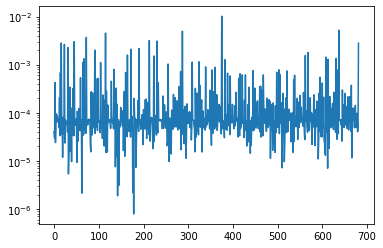

X: [7.97007324 6.03850012]
Gradient: [3.11194516e-07 8.72930682e-07]
Iterations: 682
Time taken: 29.235970735549927
Lambda:  0.0028032564354633564


In [7]:
print('----------------------')
# plt.plot(range(len(gr2)), gr2)
plt.plot(range(len(step_size_list)), step_size_list)
plt.yscale('log')
plt.show()
print('X:', x)
print('Gradient:', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

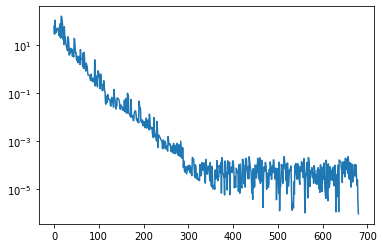

In [8]:
plt.plot(range(len(gr2)), gr2)
plt.yscale('log')
plt.show()

In [52]:
gr2[-1]

6.320558439496658e-07

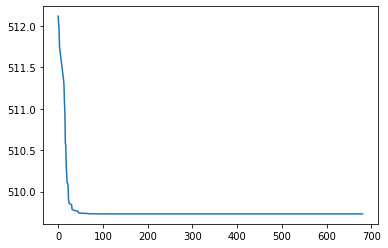

In [10]:
plt.plot(range(len(X)), X)
# plt.yscale('log')
plt.show()

Previous version

## Backtracking Line Search

In [13]:
def Line(x,f,f_grad):
    line_time = time.time()
    rho = random.random() + 1e-20
    c = random.random() + 1e-20
    alph = 1
#     gold_1 = 
#     gold_2
    while f(x - alph*f_grad(x)) > f(x) - c*alph*np.linalg.norm(f_grad(x))**2:
#         print('LHS: ', f(x - alph*f_grad(x)))
#         print('RHS: ', f(x) - c*alph*np.linalg.norm(f_grad(x))**2)
        ## is norm the right move here?
        alph = rho*alph
#     print('Alpha:', alph)
    print('At iteration ', count, 'The line search took ', \
          time.time() - line_time , 'to produce a step size of ', alph)    
    return alph
    

In [14]:

current = time.time()
X = []
# L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
# lamb = 1/L
x = xVec
count = 1
lamb = Line(x,f,f_grad)
step_size_list = [lamb]
gr2 = []

while np.linalg.norm(f_grad(x)) > 1e-6:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr2.append(np.linalg.norm(f_grad(x)))
    count += 1
    lamb = Line(x,f,f_grad)
    step_size_list.append(lamb)
    if time.time() - current > 15:
        break
#     print('x= ', x)
#     print('lambda', lamb)


At iteration  1 The line search took  0.006941795349121094 to produce a step size of  3.420440928848516e-05
At iteration  2 The line search took  0.006448030471801758 to produce a step size of  5.277655214384802e-05
At iteration  3 The line search took  0.023311614990234375 to produce a step size of  0.0002556200354366343
At iteration  4 The line search took  0.03571677207946777 to produce a step size of  3.226821620119023e-05
At iteration  5 The line search took  0.008437633514404297 to produce a step size of  0.0001295298474362168
At iteration  6 The line search took  0.002477884292602539 to produce a step size of  6.157910105486619e-05
At iteration  7 The line search took  0.005918025970458984 to produce a step size of  5.1747571397454645e-05
At iteration  8 The line search took  0.0059680938720703125 to produce a step size of  0.0005781165555180079
At iteration  9 The line search took  0.003471851348876953 to produce a step size of  4.944005591310247e-06
At iteration  10 The line s

----------------------


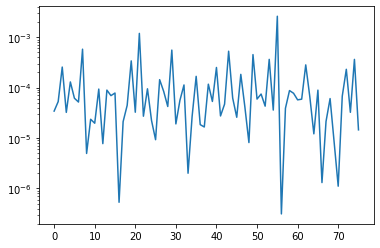

X: [1.52069362 8.79922846]
Gradient: [ 1.32563934 -7.33779044]
Iterations: 76
Time taken: 66.88159251213074
Lambda:  1.4527785798554467e-05


In [15]:
print('----------------------')
# plt.plot(range(len(gr2)), gr2)
plt.plot(range(len(step_size_list)), step_size_list)
plt.yscale('log')
plt.show()
print('X:', x)
print('Gradient:', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

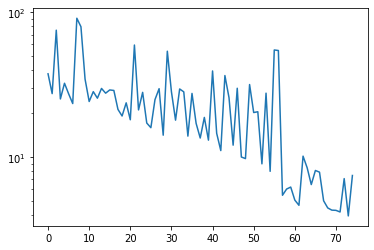

In [16]:
plt.plot(range(len(gr2)), gr2)
plt.yscale('log')
plt.show()

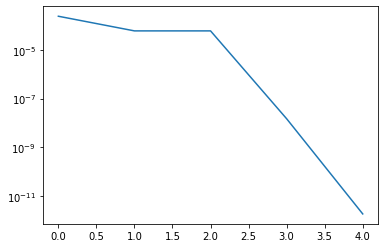

In [27]:
plt.plot(range(len(alph_list[980:985])), alph_list[980:985])
plt.yscale('log')
plt.show()

In [28]:
gr2[980:985]

[0.000124243498823773,
 7.947003602983226e-05,
 5.4876861112153264e-05,
 5.486364366084622e-05,
 5.486364366084622e-05]

In [29]:
X[980:985]

[572.460347914123,
 572.4603479141225,
 572.4603479141222,
 572.4603479141222,
 572.4603479141222]

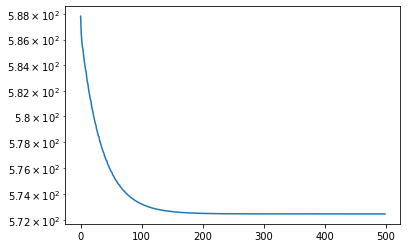

In [32]:
plt.plot(range(len(X[:500])), X[:500])
plt.yscale('log')
plt.show()

### Vanilla Gradient Descent

In [22]:
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])

In [23]:
L

30051.721100578787

----------------------


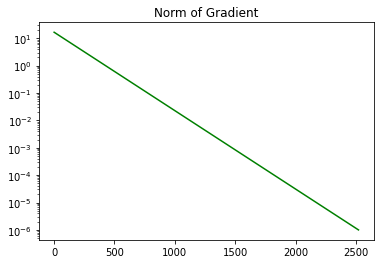

X: [2.97696038 8.03044321]
Gradient: [-9.42288779e-07  3.21379105e-07]
Iterations: 2523
Time taken: 2.5663037300109863
Lambda:  3.3275964350033194e-05


In [25]:
current = time.time()
X = []
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
lamb = 1/L
x = xVec
gr = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-6:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr.append(np.linalg.norm(f_grad(x)))
    count += 1
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.yscale('log')
plt.title(label = 'Norm of Gradient')
plt.show()
print('X:', x)
print('Gradient:', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

Adaptive Gradient Descent

----------------------
x value [2.97696039 8.03044321]
Gradient [ 8.43805026e-11 -4.51336746e-11]
Iterations: 1492
Time taken: 1.6229116916656494
Lambda:  [0.14662867626418408, 1.676633104211331e-05, 1.6637987374467706e-05, 1.7202211627091162e-05, 1.92114811118082e-05, 0.00011819078521288929, 0.0003205181531516811, 0.00020902364502613807, 0.00012146543096276834, 7.928894413074248e-05, 4.665966855210577e-05, 6.468348740012828e-05]


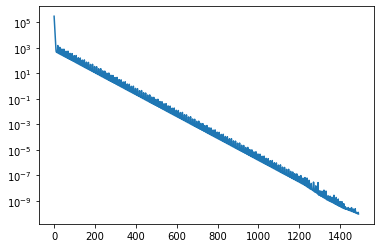

In [28]:
current = time.time()
X =[]
lam = random.random()
# print('lambda initial: ',lam)
Lambd = [lam]
theta = 100000
# print('theta intial:', theta)
x = xVec
# print('x intial:', x)
x1 = GD(x,lam,f_grad)
# print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-10:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
#     print('min1:', min1)
#     print('min2:', min2)
    lam = np.min([min1, min2])
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = x1
    x1 = GD(x1, lam, f_grad)
#     print('x1:', x1)
    x = temp
#     print('x:', x)
    theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
#     print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(len(gr2)) , gr2)
plt.yscale('log')
# plt.plot(range(10), gr2[:10], c='g')
# plt.title(label = 'Norm of Gradient: [0,10]')
# plt.show()
# plt.plot(range(11,50), gr2[11:50], c='g')
# plt.title(label = 'Norm of Gradient: [11,50]')
# plt.show()
# plt.plot(range(51,100), gr2[51:100], c='g')
# plt.title(label = 'Norm of Gradient: [51,100]')
# plt.show()
# plt.plot(range(101,600), gr2[101:600], c='g')
# plt.title(label = 'Norm of Gradient: [101,600]')
# plt.show()
# plt.plot(range(601,len(gr2)), gr2[601:], c='g')
# plt.title(label = 'Norm of Gradient: [601, end]')
# plt.show()

print('x value', x1)
print('Gradient', f_grad(x1))
print('Iterations:', count)
print('Time taken:', time.time() - current)
La = [Lambd[0], Lambd[1]]
for i in range(2,len(Lambd), int(np.floor(len(Lambd)/10))):
    La.append(Lambd[i])
print('Lambda: ', La)

Generating data

In [ ]:
k = 5
for i in range(100):
    globals()['x'+str(i)] = k
    k = k*2

In [ ]:
for i in range(10):
    globals()['X'+str(i)] = [0]*10
for j in range(10):
    globals()['X'+str(0)][j] = (random.random()+1e-12)*10
    y = 2*globals()['X'+str(0)][j] + 5
    noiz = 3
    for k in range(10):
        globals()['X'+str(k)][j] = y + np.random.normal(0,noiz)
        noiz += 3
A = [globals()['X'+str(i)] for i in range(10)]

In [ ]:
def linFunc(x):
    return 2*x + 5

In [ ]:
def generate(function, dim, vec_len, scale):
    """
    Where A is an array of inputs for 'x'
    """
    for i in range(dim):
        globals()['X'+str(i)] = [0]*vec_len
    for j in range(vec_len):
        globals()['X'+str(0)][j] = (random.random()+1e-12)*scale
        y = function(globals()['X'+str(0)][j])
        noiz = 3
        for k in range(dim):
            globals()['X'+str(k)][j] = y + np.random.normal(0,noiz)
            noiz += 3
    A = [globals()['X'+str(i)] for i in range(dim)]
    return(A)